In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

models_path = "../dataset/models/"
scenes_path = "../dataset/scenes/"

products_A = {i: f"{models_path}ref{i}.png" for i in range(1, 15)}
products_B = {i: f"{models_path}ref{i}.png" for i in range(15, 28)}

scenes_A = {i: f"{scenes_path}scene{i}.png" for i in range(1, 6)}
scenes_B = {i: f"{scenes_path}scene{i}.png" for i in range(6, 13)}

In [29]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)

    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

(560, 225) (662, 1488)


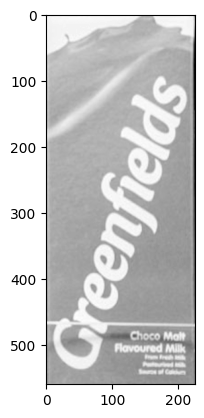

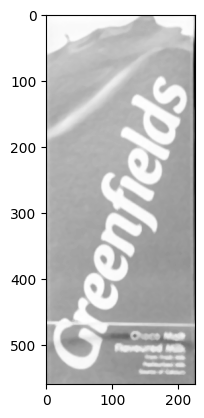

(560, 225) (662, 1488)


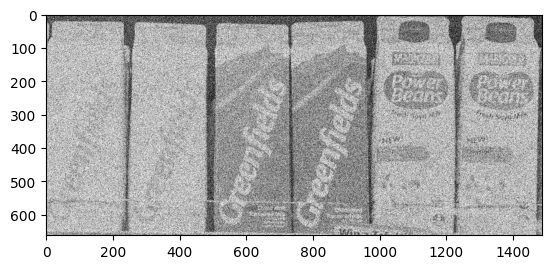

In [32]:
# Load the template and target images
target = cv2.imread(scenes_B[9], 0)  # Load in grayscale
template = cv2.imread(products_B[19], 0)  # Load in grayscale
template=image_resize(template,None,560,) # w,h
print(template.shape,target.shape)
plt.imshow(template,cmap='gray')
plt.show()
template=cv2.medianBlur(template,3)
template=cv2.medianBlur(template,3)
template=cv2.medianBlur(template,5)
plt.imshow(template,cmap='gray')
plt.show()
plt.imshow(target,cmap='gray')
print(template.shape,target.shape)

In [33]:


# Initialize the Generalized Hough Transform object
guil = cv2.createGeneralizedHoughGuil()

# Set the template image
guil.setTemplate(template)

# Set parameters
guil.setCannyLowThresh(50)
guil.setCannyHighThresh(150)
guil.setMinDist(100)
guil.setDp(2)

# Detect the shapes in the target image
positions, votes = guil.detect(target)

# Draw the detected shapes
output_image = cv2.cvtColor(target, cv2.COLOR_GRAY2BGR)
for pos in positions:
    x, y, scale, angle = pos
    center = (int(x), int(y))
    # Draw a circle at the center of the detected shape
    cv2.circle(output_image, center, 10, (0, 255, 0), 2)

# Display the results
plt.imshow('Detected Shapes', output_image)



ValueError: not enough values to unpack (expected 4, got 1)

[[[124.    66.     0.75 270.  ]]]


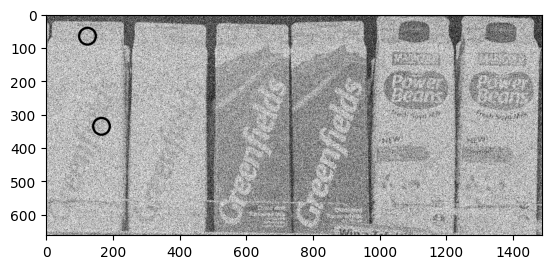

In [35]:
print(positions)

plt.imshow(cv2.circle(target,(124,66),25,(0,0,0),5),cmap='gray')